In [ ]:
# 生命线
# https://lifelines.readthedocs.io/en/latest
# 可靠性
# https://reliability.readthedocs.io/en/latest

In [ ]:
# 经济性和安全性方面考虑
# 1.研究飞机零部件的寿命分析，减少非计划性维修，增加计划性维修(维修时间间隔计算)；
# 2.保证合适的库存(库存管理)；

### example

In [3]:
from reliability.Distributions import Weibull_Distribution
from reliability.Nonparametric import KaplanMeier
import numpy as np
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=30,beta=2) #creates the distribution object
failures = dist.random_samples(100) #draws 100 samples from the distribution
xvals = np.linspace(0,max(failures),1000) #generates the plotting range
KaplanMeier(failures=failures,label='Non-parametric') #creates the non-parametric estimate
dist.SF(xvals=xvals,label='Parametric') #plots the survival function
plt.legend()
plt.show()


               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
2.279608                               1.0              100                   0.99        0.970499        1.000000
6.350695                               1.0               99                   0.98        0.952561        1.000000
6.698603                               1.0               98                   0.97        0.936566        1.000000
7.598517                               1.0               97                   0.96        0.921593        0.998407
7.654881                               1.0               96                   0.95        0.907284        0.992716
7.757802                               1.0               95                   0.94        0.893453        0.986547
8.715912                               1.0               94                   0.

<Figure size 640x480 with 1 Axes>

                  Alpha     Beta    Gamma       Mu     Sigma     Lambda     AICc      BIC
Distribution                                                                             
Weibull_2P      11.2773  3.30301                                         488.041  493.128
Normal_2P                                  10.1194    3.3748             489.082  494.169
Gamma_2P        1.42315  7.21352                                         490.594   495.68
Lognormal_2P                               2.26518  0.406349             495.694   500.78
Weibull_3P      8.26611  2.00287  2.82002                                496.887  501.974
Gamma_3P        3.21732  2.38197  2.82002                                508.779  513.866
Exponential_2P                    2.82902                      0.121713  536.287  538.852
Exponential_1P                                                0.0870022  594.034  596.598


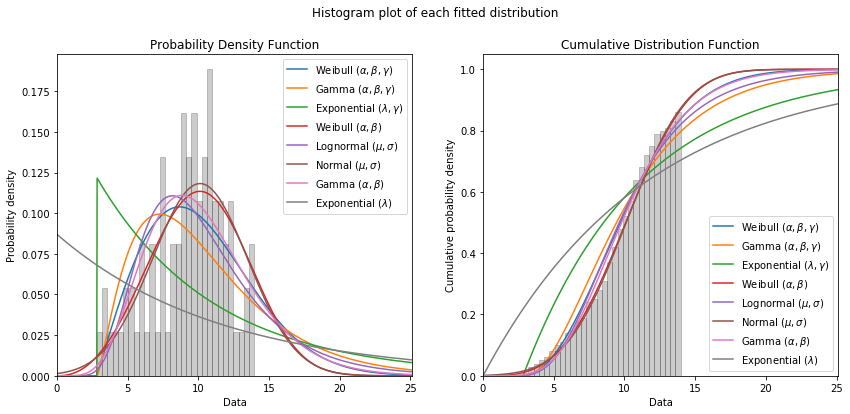

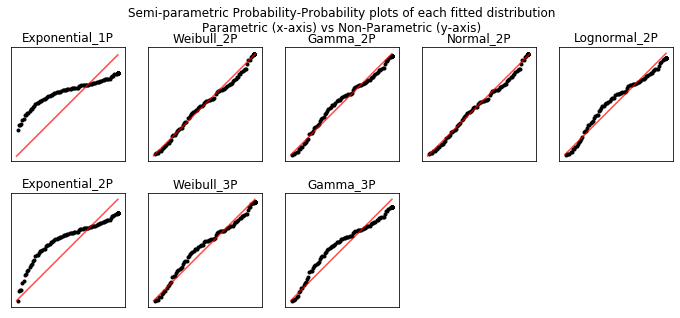

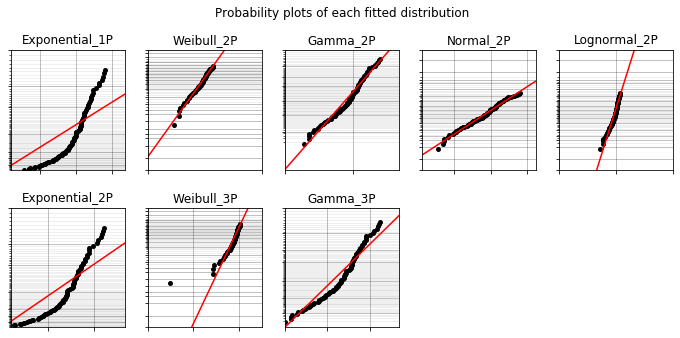

The best fitting distribution was Weibull_2P which had parameters [11.27730625  3.30300693  0.        ]


In [24]:
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution, Lognormal_Distribution, Exponential_Distribution
import numpy as np
#create some failures and right censored data
np.random.seed(2) #this is just for repeatability for this tutorial
uncensored_data = Weibull_Distribution(alpha=12, beta=3).random_samples(100)
failures = []
censored = []
for item in uncensored_data:
    if item >=14:
        censored.append(14)
    else:
        failures.append(item)
#fit everything
results=Fit_Everything(failures=failures,right_censored=censored)
print('The best fitting distribution was',results.best_distribution_name,'which had parameters',results.best_distribution.parameters)


In [39]:
r = results.results.index
r

Index(['Weibull_2P', 'Normal_2P', 'Gamma_2P', 'Lognormal_2P', 'Weibull_3P', 'Gamma_3P', 'Exponential_2P', 'Exponential_1P'], dtype='object', name='Distribution')

In [178]:
failures

[9.965251918918582,
 3.5671790548638915,
 11.129396688126427,
 9.958335138172451,
 9.804137858757983,
 8.848871462899062,
 7.341333007882996,
 11.8610670970071,
 8.506256296560977,
 8.12474377132293,
 11.881115116323524,
 10.918202418010505,
 6.297635794672023,
 10.75875114310268,
 7.06273437756675,
 13.853635635428418,
 10.561109270534512,
 5.234407697718311,
 10.673561536811699,
 4.886318875528343,
 9.884192484407682,
 5.597864120441154,
 6.171120944418085,
 11.620897263167148,
 7.621497977376327,
 5.803351312558182,
 7.547957744718117,
 9.061030174213212,
 10.291018766901795,
 7.30215445137465,
 12.090443335003567,
 10.447100425611424,
 10.673465782423117,
 9.455429001655506,
 13.971015914348309,
 11.444746098515836,
 6.738793879711103,
 12.77482839071981,
 10.62004993708945,
 8.972097519798522,
 11.310548541084891,
 9.878249885722296,
 9.972988370427693,
 13.732322584420299,
 10.984571018339798,
 11.073128585661134,
 5.289843103288344,
 9.238066967306796,
 9.658018048156801,
 3.625

### test

In [ ]:
# 所有提供的数据（含有故障零件和无故障零件，已修好的在使用的零件）

In [9]:
from reliability.Nonparametric import KaplanMeier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pa = "data_csv\\541674-4.csv"
data1 = pd.read_csv(pa, encoding = "GBK")
data1["部件本次装机使用小时"] = data1["部件本次装机使用小时"].str.split(':').str[0].astype(int)
data1 = data1[data1["部件本次装机使用小时"]>0]
data1["IsPlanned"] = data1["非计划"]=="X"
data_y = data1[["IsPlanned", "部件本次装机使用小时"]]

data1["IsPlaneNew"] = data1["部件装上飞行小时数"]=="00:00"
data1["IsPartNew"] = data1["部件装上使用小时数"]=="00:00"
def CheckNew(p1,p2):
    if p1 and p2:
        return "PlaneNew-PartNew"
    elif p1 and not p2:
        return "PlaneNew-PartOld"
    elif not p1 and p2:
        return "PlaneOld-PartNew"
    elif not p1 and not p2:
        return "PlaneOld-PartOld"

data1["PlanePartType"] = [CheckNew(row["IsPlaneNew"], row["IsPartNew"]) for idx, row in data1.iterrows()]

data1["安装日期"] = pd.to_datetime(data1["安装日期"])
data1["安装年度"] = data1["安装日期"].dt.year

di = {"霍尼韦尔": "HONEYWELL"}
data1.replace({"最近送修公司": di}, inplace=True)
data1["最近送修公司"].fillna("Unknown", inplace=True)

data1["FH TSN"].fillna("00:00", inplace=True)
data1["部件装上飞行小时数"] = data1["部件装上飞行小时数"].str.split(':').str[0].astype(int)
data1["部件装上使用小时数"] = data1["部件装上使用小时数"].str.split(':').str[0].astype(int)

data1["部件装上飞行小时数-Range"] = pd.cut(data1['部件装上飞行小时数'], 8)
data1["部件装上使用小时数-Range"] = pd.cut(data1['部件装上使用小时数'], 8)
data1["CY TSN-Range"] = pd.cut(data1['CY TSN'], 8)
data1["FH TSN-Range"] = pd.cut(data1['FH TSN'], 8)

data_x = data1[["机型","安装年度","部件装上飞行小时数-Range","部件装上使用小时数-Range","FH TSN-Range", "最近送修公司",
                "PlanePartType"]]

# 含有故障零件和未损坏零件
display(data_x)
display(data_y)
data1.shape

,机型,安装年度,部件装上飞行小时数-Range,部件装上使用小时数-Range,FH TSN-Range,最近送修公司,PlanePartType
0,73C,2000,"(-61.651, 7706.375]","(-94.78, 11847.5]","(25585.132, 38377.699]",Unknown,PlaneNew-PartNew
1,73C,2009,"(38531.875, 46238.25]","(35542.5, 47390.0]","(12792.566, 25585.132]",Unknown,PlaneOld-PartOld
2,73C,2002,"(-61.651, 7706.375]","(-94.78, 11847.5]","(38377.699, 51170.265]",Unknown,PlaneNew-PartNew
3,73C,1995,"(-61.651, 7706.375]","(-94.78, 11847.5]","(51170.265, 63962.831]",Unknown,PlaneNew-PartNew
4,73C,2005,"(38531.875, 46238.25]","(35542.5, 47390.0]","(12792.566, 25585.132]",GAMECO,PlaneOld-PartOld
6,73C,2008,"(38531.875, 46238.25]","(23695.0, 35542.5]","(12792.566, 25585.132]",Unknown,PlaneOld-PartOld
7,73C,2008,"(30825.5, 38531.875]","(35542.5, 47390.0]","(51170.265, 63962.831]",武汉航达,PlaneOld-PartOld
8,73C,2003,"(-61.651, 7706.375]","(-94.78, 11847.5]","(51170.265, 63962.831]",Unknown,PlaneNew-PartNew
9,73C,1997,"(-61.651, 7706.375]","(-94.78, 11847.5]","(12792.566, 25585.132]",Unknown,PlaneNew-PartNew
10,73C,1996,"(-61.651, 7706.375]","(-94.78, 11847.5]","(25585.132, 38377.699]",Unknown,PlaneNew-PartNew


,IsPlanned,部件本次装机使用小时
0,True,45588
1,True,901
2,True,45119
3,True,44695
4,True,151
6,True,981
7,False,1591
8,True,40114
9,True,20609
10,True,37429


(883, 44)

In [6]:
y = data_y['部件本次装机使用小时']
# y= y.to_records(index=False)
y = np.array(y)
y.shape

(883,)

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              883               0.998867        0.996649        1.000000
6.0                                    1.0              882               0.997735        0.994599        1.000000
8.0                                    1.0              881               0.996602        0.992764        1.000000
9.0                                    1.0              880               0.995470        0.991041        0.999899
9.0                                    1.0              879               0.994337        0.989388        0.999287
9.0                                    1.0              878               0.993205        0.987786        0.998624
9.0                                    1.0              877               0.9920

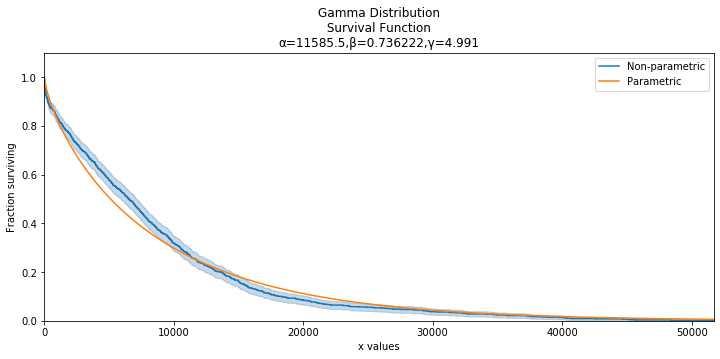

In [156]:
plt.figure(figsize=(12,5))

from reliability.Distributions import Gamma_Distribution
dist = Gamma_Distribution(alpha=11585.5, beta=0.736222,gamma=4.991)

y = data_y['部件本次装机使用小时']
# y_ = y.to_records(index=False) 
# y = list(y)
# y
xvals = np.linspace(0,max(y),1000) #generates the plotting range
KaplanMeier(failures=y,label='Non-parametric') #creates the non-parametric estimate
dist.SF(xvals=xvals,label='Parametric') #plots the survival function
# dist.SF()
plt.legend()
plt.show()

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              883               0.998867        0.996649        1.000000
6.0                                    1.0              882               0.997735        0.994599        1.000000
8.0                                    1.0              881               0.996602        0.992764        1.000000
9.0                                    1.0              880               0.995470        0.991041        0.999899
9.0                                    1.0              879               0.994337        0.989388        0.999287
9.0                                    1.0              878               0.993205        0.987786        0.998624
9.0                                    1.0              877               0.9920

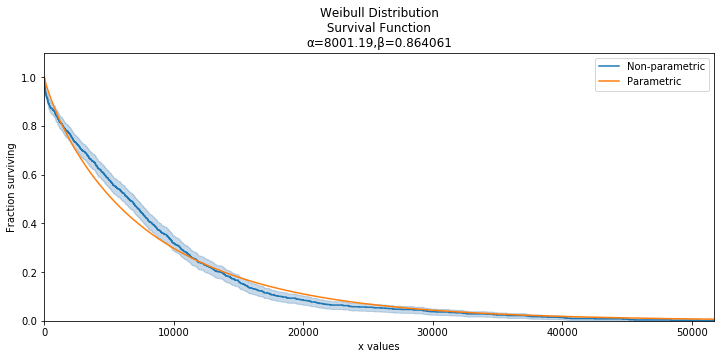

In [157]:
plt.figure(figsize=(12,5))

from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=8001.19, beta=0.864061)
y = data_y['部件本次装机使用小时']
xvals = np.linspace(0,max(y),1000)
KaplanMeier(failures=y,label='Non-parametric')
dist.SF(xvals=xvals,label='Parametric')
plt.legend()
plt.show()

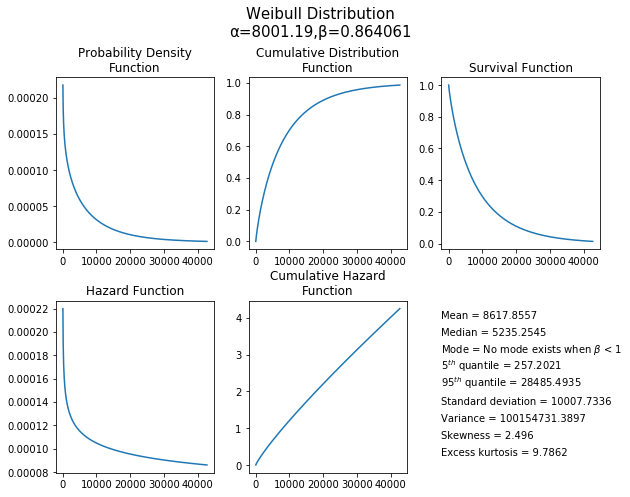

51712

In [45]:
from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=8001.19, beta=0.864061)
y = data_y['部件本次装机使用小时']
xvals = np.linspace(0,max(y),1000)
# KaplanMeier(failures=y,label='Non-parametric')
# dist.SF(xvals=xvals,label='Parametric')
dist.plot()
# plt.legend()
plt.show()
max(y)

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              883               0.998867        0.996649        1.000000
6.0                                    1.0              882               0.997735        0.994599        1.000000
8.0                                    1.0              881               0.996602        0.992764        1.000000
9.0                                    1.0              880               0.995470        0.991041        0.999899
9.0                                    1.0              879               0.994337        0.989388        0.999287
9.0                                    1.0              878               0.993205        0.987786        0.998624
9.0                                    1.0              877               0.9920

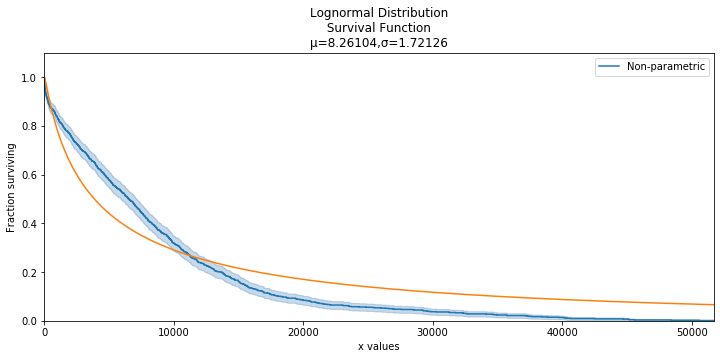

In [215]:
from reliability.Distributions import Lognormal_Distribution
plt.figure(figsize=(12,5))
dist = Lognormal_Distribution(mu=8.26104, sigma=1.72126)
y = data_y['部件本次装机使用小时']
KaplanMeier(failures=y,label='Non-parametric')
dist.SF()
plt.legend()
plt.show()

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              883               0.998867        0.996649        1.000000
6.0                                    1.0              882               0.997735        0.994599        1.000000
8.0                                    1.0              881               0.996602        0.992764        1.000000
9.0                                    1.0              880               0.995470        0.991041        0.999899
9.0                                    1.0              879               0.994337        0.989388        0.999287
9.0                                    1.0              878               0.993205        0.987786        0.998624
9.0                                    1.0              877               0.9920

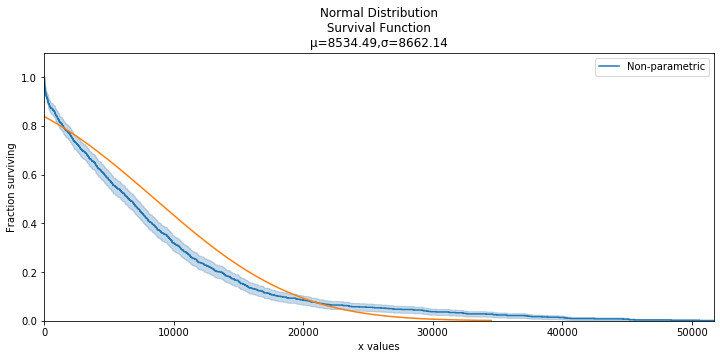

In [159]:
from reliability.Distributions import Normal_Distribution
plt.figure(figsize=(12,5))
dist = Normal_Distribution(mu=8534.49, sigma=8662.14)
y = data_y['部件本次装机使用小时']
KaplanMeier(failures=y,label='Non-parametric')
dist.SF()
plt.legend()
plt.show()


# 全部为损坏零件

In [162]:

data1 = data1.loc[data1["IsPlanned"] == True, ]
data1

,机型,制造序列号,机号,参考类型,...,部件装上飞行小时数-Range,部件装上使用小时数-Range,CY TSN-Range,FH TSN-Range
0,73C,73C02581,2938,DE,...,"(-61.651, 7706.375]","(-94.78, 11847.5]","(12230.0, 18345.0]","(25585.132, 38377.699]"
1,73C,73C02581,2938,DE,...,"(38531.875, 46238.25]","(35542.5, 47390.0]","(12230.0, 18345.0]","(12792.566, 25585.132]"
2,73C,73C02581,2938,DE,...,"(-61.651, 7706.375]","(-94.78, 11847.5]","(24460.0, 30575.0]","(38377.699, 51170.265]"
3,73C,73C01866,2960,DE,...,"(-61.651, 7706.375]","(-94.78, 11847.5]","(36690.0, 42805.0]","(51170.265, 63962.831]"
4,73C,73C01866,2960,DE,...,"(38531.875, 46238.25]","(35542.5, 47390.0]","(12230.0, 18345.0]","(12792.566, 25585.132]"
6,73C,73C02543,2990,DE,...,"(38531.875, 46238.25]","(23695.0, 35542.5]","(6115.0, 12230.0]","(12792.566, 25585.132]"
8,73C,73C02543,2990,DE,...,"(-61.651, 7706.375]","(-94.78, 11847.5]","(30575.0, 36690.0]","(51170.265, 63962.831]"
9,73C,73C02939,2989,DE,...,"(-61.651, 7706.375]","(-94.78, 11847.5]","(12230.0, 18345.0]","(12792.566, 25585.132]"
10,73C,73C02782,2965,DE,...,"(-61.651, 7706.375]","(-94.78, 11847.5]","(18345.0, 24460.0]","(25585.132, 38377.699]"
11,73C,73C02811,2970,DE,...,"(-61.651, 7706.375]","(-94.78, 11847.5]","(6115.0, 12230.0]","(12792.566, 25585.132]"


In [163]:
data_y = data1[["IsPlanned", "部件本次装机使用小时"]]
data_y

,IsPlanned,部件本次装机使用小时
0,True,45588
1,True,901
2,True,45119
3,True,44695
4,True,151
6,True,981
8,True,40114
9,True,20609
10,True,37429
11,True,40649


In [181]:
y = data_y['部件本次装机使用小时']
# y= y.to_records(index=False)
y = np.array(y)
y

array([45588,   901, 45119, 44695,   151,   981, 40114, 20609, 37429,
       40649,  3431, 34627,  1164, 39734,   160,  3960, 32364, 45191,
       26345, 40390, 20236, 10126, 13960, 20937,    36, 15725,  6871,
       20611, 13338, 13168,  2885,  1487,  6917, 18835, 14414,  3951,
        9691,  9268,  9711,  3977, 10474,  1986,  1406, 11780, 14651,
        3813, 13341, 11447,  2760, 12343, 15651, 16440,   854, 15876,
        9878,  4178,   127,   411, 13509,  7973, 14985,  8003, 15477,
         865, 17409,   688, 10611,  8214,   502,  1020, 20007, 22042,
        2065,  4944, 14019, 21179, 19483, 11790, 13819, 23032,  4828,
       14992, 14258,  7494, 23495, 19965,  1045, 21225, 17379,  2542,
        6590,  2789,    31,  6403,  5724,  5045, 24868,   523,  4944,
       28472,    11, 19424,    53,    44, 17774,  1219, 14065, 18385,
        3670, 18697,  6240,  5609,  4107,  5018, 16283,  8419, 10302,
        1131,  3363,  5857,  7669,  6812,  2018,  8749, 10944,  3584,
         672,  2453,

                  Alpha      Beta  Gamma       Mu    Sigma       Lambda     AICc      BIC
Distribution                                                                             
Gamma_3P          11444   0.77104  4.991                                   16101  16110.4
Gamma_2P          11123  0.793743                                        16110.6    16120
Weibull_3P      8369.07  0.882172  4.991                                 16120.4  16129.8
Weibull_2P      8427.89  0.895811                                        16125.9  16135.3
Exponential_2P                         5                     0.00011333  16138.3    16143
Exponential_1P                                              0.000113266  16139.2  16143.9
Lognormal_2P                              8.33729   1.6839               16447.8  16457.1
Normal_2P                                 8828.81  8702.71               16788.5  16797.9


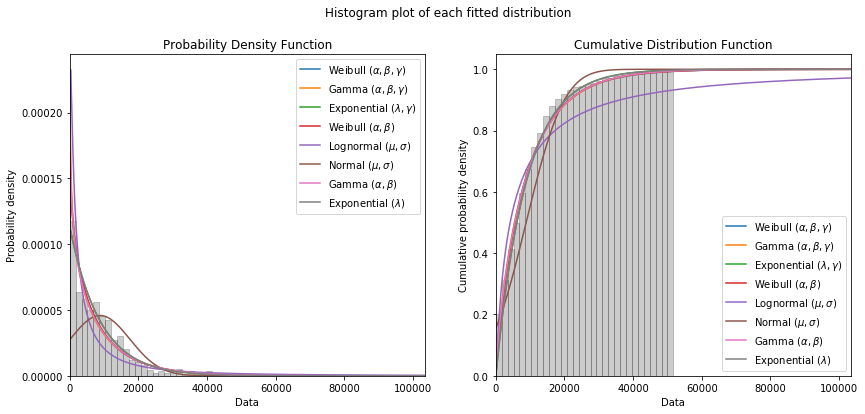

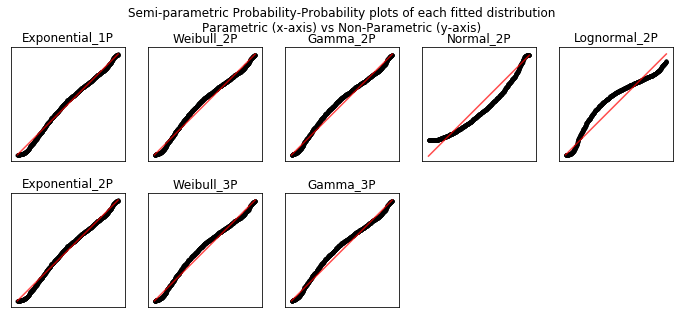

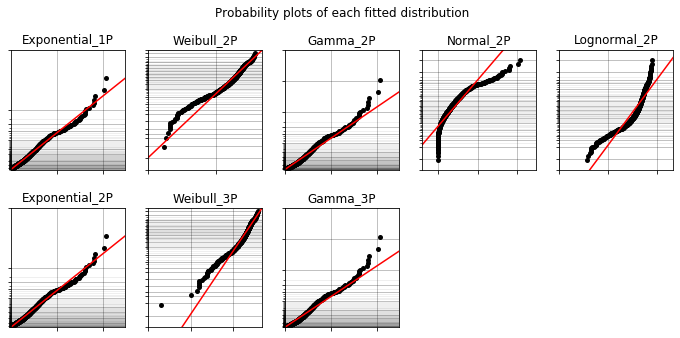

The best fitting distribution was Gamma_3P which had parameters [1.14440453e+04 7.71040183e-01 4.99100000e+00]


In [165]:
from reliability.Fitters import Fit_Everything
results = Fit_Everything(failures=y)
print('The best fitting distribution was',results.best_distribution_name,'which had parameters',results.best_distribution.parameters)


               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              800                0.99875        0.996302        1.000000
6.0                                    1.0              799                0.99750        0.994040        1.000000
8.0                                    1.0              798                0.99625        0.992015        1.000000
9.0                                    1.0              797                0.99500        0.990112        0.999888
9.0                                    1.0              796                0.99375        0.988289        0.999211
9.0                                    1.0              795                0.99250        0.986521        0.998479
9.0                                    1.0              794                0.991

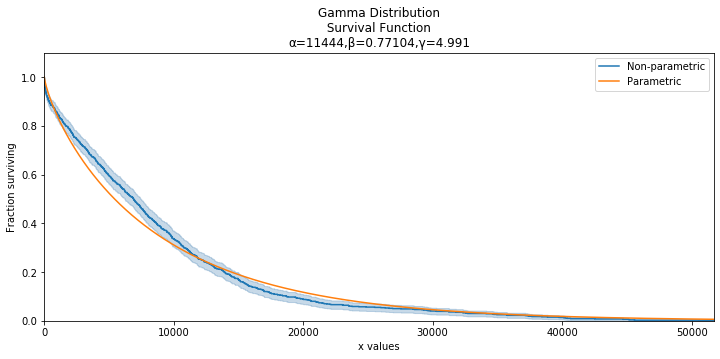

In [166]:
plt.figure(figsize=(12,5))

from reliability.Distributions import Gamma_Distribution
dist = Gamma_Distribution(alpha=11444, beta=0.77104,gamma=4.991)
   
y = data_y['部件本次装机使用小时']
# y_ = y.to_records(index=False) 
# y = list(y)
# y
xvals = np.linspace(0,max(y),1000) #generates the plotting range
KaplanMeier(failures=y,label='Non-parametric') #creates the non-parametric estimate
dist.SF(xvals=xvals,label='Parametric') #plots the survival function
# dist.SF()
plt.legend()
plt.show()

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              800                0.99875        0.996302        1.000000
6.0                                    1.0              799                0.99750        0.994040        1.000000
8.0                                    1.0              798                0.99625        0.992015        1.000000
9.0                                    1.0              797                0.99500        0.990112        0.999888
9.0                                    1.0              796                0.99375        0.988289        0.999211
9.0                                    1.0              795                0.99250        0.986521        0.998479
9.0                                    1.0              794                0.991

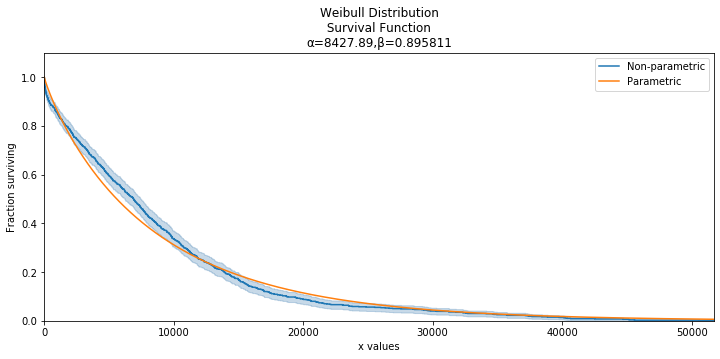

In [167]:
plt.figure(figsize=(12,5))

from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=8427.89, beta=0.895811)    
y = data_y['部件本次装机使用小时']
xvals = np.linspace(0,max(y),1000)
KaplanMeier(failures=y,label='Non-parametric')
dist.SF(xvals=xvals,label='Parametric')
plt.legend()
plt.show()

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              800                0.99875        0.996302        1.000000
6.0                                    1.0              799                0.99750        0.994040        1.000000
8.0                                    1.0              798                0.99625        0.992015        1.000000
9.0                                    1.0              797                0.99500        0.990112        0.999888
9.0                                    1.0              796                0.99375        0.988289        0.999211
9.0                                    1.0              795                0.99250        0.986521        0.998479
9.0                                    1.0              794                0.991

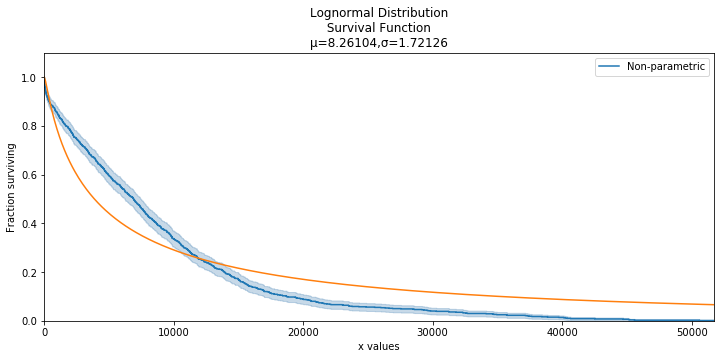

In [168]:
from reliability.Distributions import Lognormal_Distribution
plt.figure(figsize=(12,5))
dist = Lognormal_Distribution(mu=8.26104, sigma=1.72126)
y = data_y['部件本次装机使用小时']
KaplanMeier(failures=y,label='Non-parametric')
dist.SF()
plt.legend()
plt.show()

## 预测生存概率曲线

In [203]:
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxnetSurvivalAnalysis  #CoxPHSurvivalAnalysis
from sksurv.linear_model import CoxPHSurvivalAnalysis
x = data_x.copy()
cat_features =  ["机型", "安装年度","部件装上飞行小时数-Range","部件装上使用小时数-Range","FH TSN-Range", 
                 "最近送修公司","PlanePartType"]
for col in cat_features:
    x[col] = x[col].astype('category')
data_x_numeric = OneHotEncoder().fit_transform(x[cat_features])
display(data_x_numeric)

# 将数据aframe转换为NumPy记录数组。
y=data_y.to_records(index=False)
display(y)

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, y)


,机型=73N,机型=73Q,安装年度=1994,安装年度=1995,...,最近送修公司=重庆鹏华,PlanePartType=PlaneNew-PartOld,PlanePartType=PlaneOld-PartNew,PlanePartType=PlaneOld-PartOld
0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0


rec.array([( True, 45588), ( True,   901), ( True, 45119), ( True, 44695),
           ( True,   151), ( True,   981), (False,  1591), ( True, 40114),
           ( True, 20609), ( True, 37429), ( True, 40649), ( True,  3431),
           ( True, 34627), ( True,  1164), ( True, 39734), ( True,   160),
           ( True,  3960), ( True, 32364), (False, 29257), ( True, 45191),
           ( True, 26345), ( True, 40390), ( True, 20236), ( True, 10126),
           ( True, 13960), ( True, 20937), ( True,    36), ( True, 15725),
           ( True,  6871), ( True, 20611), ( True, 13338), ( True, 13168),
           ( True,  2885), ( True,  1487), ( True,  6917), ( True, 18835),
           ( True, 14414), ( True,  3951), ( True,  9691), ( True,  9268),
           ( True,  9711), ( True,  3977), ( True, 10474), ( True,  1986),
           ( True,  1406), ( True, 11780), ( True, 14651), ( True,  3813),
           ( True, 13341), ( True, 11447), ( True,  2760), ( True, 12343),
           ( True, 15651)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, ties='breslow', tol=1e-09, verbose=0)

In [205]:
new = data_x_numeric.loc[[200]]
new

,机型=73N,机型=73Q,安装年度=1994,安装年度=1995,...,最近送修公司=重庆鹏华,PlanePartType=PlaneNew-PartOld,PlanePartType=PlaneOld-PartNew,PlanePartType=PlaneOld-PartOld
200,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0


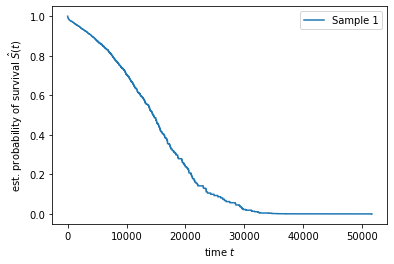

In [206]:
pred_surv = estimator.predict_survival_function(new)

for i, c in enumerate(pred_surv):
    plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              883               0.998867        0.996649        1.000000
6.0                                    1.0              882               0.997735        0.994599        1.000000
8.0                                    1.0              881               0.996602        0.992764        1.000000
9.0                                    1.0              880               0.995470        0.991041        0.999899
9.0                                    1.0              879               0.994337        0.989388        0.999287
9.0                                    1.0              878               0.993205        0.987786        0.998624
9.0                                    1.0              877               0.9920

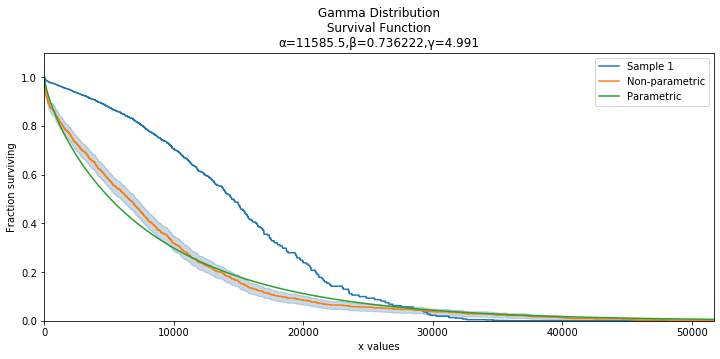

In [211]:
plt.figure(figsize=(12,5))
pred_surv = estimator.predict_survival_function(new)

for i, c in enumerate(pred_surv):
    plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

from reliability.Distributions import Gamma_Distribution
dist = Gamma_Distribution(alpha=11585.5, beta=0.736222,gamma=4.991)

y = data_y['部件本次装机使用小时']
# y_ = y.to_records(index=False) 
y = list(y)
# y
xvals = np.linspace(0,max(y),1000) #generates the plotting range
KaplanMeier(failures=y,label='Non-parametric') #creates the non-parametric estimate
dist.SF(xvals=xvals,label='Parametric') #plots the survival function
# dist.SF()
plt.legend()
plt.show()

In [209]:
li_x = []
li_y = []
for j in pred_surv:
    for n in range(len(j.x)):
        dic_x = j.x[n]
        dic_y = j.y[n]
        li_x.append(dic_x)
        li_y.append(dic_y)
display(li_x)
display(li_y)

[5,
 6,
 8,
 9,
 11,
 14,
 16,
 19,
 20,
 21,
 22,
 29,
 30,
 31,
 32,
 35,
 36,
 38,
 39,
 40,
 43,
 44,
 46,
 53,
 55,
 57,
 61,
 62,
 72,
 76,
 78,
 80,
 81,
 84,
 87,
 88,
 89,
 90,
 108,
 110,
 113,
 126,
 127,
 128,
 130,
 138,
 139,
 146,
 151,
 160,
 171,
 174,
 176,
 191,
 216,
 224,
 225,
 227,
 240,
 254,
 267,
 272,
 279,
 284,
 287,
 288,
 289,
 296,
 300,
 303,
 311,
 321,
 323,
 334,
 343,
 352,
 363,
 389,
 394,
 405,
 411,
 422,
 424,
 428,
 440,
 444,
 479,
 492,
 495,
 502,
 510,
 523,
 620,
 623,
 662,
 664,
 672,
 688,
 713,
 770,
 791,
 797,
 798,
 818,
 820,
 822,
 826,
 843,
 854,
 863,
 865,
 872,
 877,
 890,
 901,
 909,
 955,
 956,
 981,
 986,
 1014,
 1020,
 1021,
 1023,
 1030,
 1036,
 1045,
 1058,
 1097,
 1103,
 1121,
 1131,
 1134,
 1146,
 1147,
 1159,
 1164,
 1173,
 1176,
 1219,
 1231,
 1254,
 1264,
 1326,
 1331,
 1365,
 1369,
 1391,
 1394,
 1396,
 1406,
 1433,
 1434,
 1462,
 1464,
 1465,
 1486,
 1487,
 1523,
 1526,
 1546,
 1556,
 1586,
 1591,
 1614,
 1618,


[0.9997620695741266,
 0.9995237401829037,
 0.9992848841623211,
 0.9983246872524906,
 0.9980830593068402,
 0.9978410931369787,
 0.9975989754900967,
 0.9971138876316828,
 0.9963852074054936,
 0.9958981385149008,
 0.9956536699554348,
 0.9954090583718851,
 0.9951643035615921,
 0.9949191282092623,
 0.9946738300824186,
 0.9944281690761494,
 0.9941822695616579,
 0.9941822695616579,
 0.9941822695616579,
 0.9939345558145506,
 0.9936863244933372,
 0.9934372246549341,
 0.9934372246549341,
 0.9929381582586254,
 0.9926882652661123,
 0.9924379959460402,
 0.9919331685765965,
 0.9916795997568066,
 0.9914256854895204,
 0.9909175452288932,
 0.9906601051269768,
 0.9906601051269768,
 0.9904023521557342,
 0.9901437369862861,
 0.989884125220122,
 0.9896210637789685,
 0.9896210637789685,
 0.9893568045735115,
 0.9890923568836821,
 0.9885634017858309,
 0.9882925472385109,
 0.9880212394926584,
 0.9877496012334561,
 0.9874774783985569,
 0.9874774783985569,
 0.9872043959338412,
 0.986930955139893,
 0.986656940265

               Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
Failure times                                                                                                     
5.0                                    1.0              883               0.998867        0.996649        1.000000
6.0                                    1.0              882               0.997735        0.994599        1.000000
8.0                                    1.0              881               0.996602        0.992764        1.000000
9.0                                    1.0              880               0.995470        0.991041        0.999899
9.0                                    1.0              879               0.994337        0.989388        0.999287
9.0                                    1.0              878               0.993205        0.987786        0.998624
9.0                                    1.0              877               0.9920

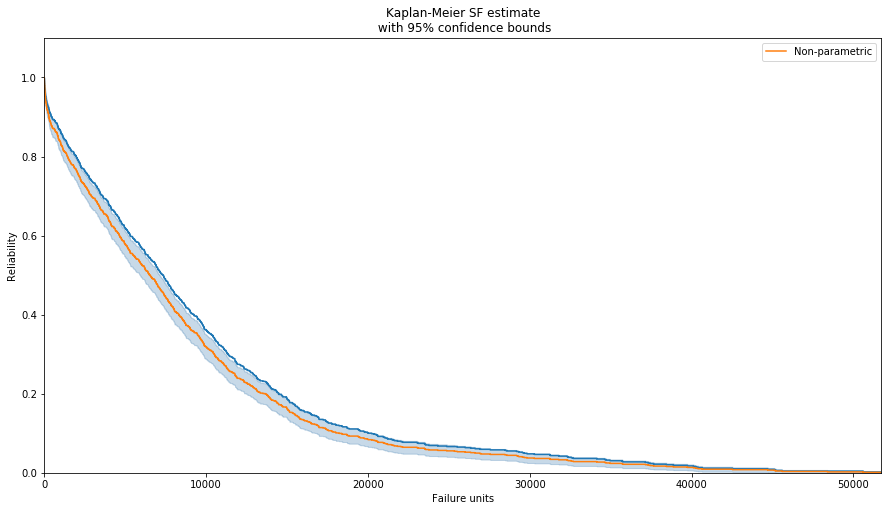

In [232]:
from sksurv.nonparametric import kaplan_meier_estimator
time, survival_prob = kaplan_meier_estimator(data_y['IsPlanned'], data_y['部件本次装机使用小时'])
plt.figure(figsize=(15,8)) 
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Component survival probability curve')

from reliability.Distributions import Gamma_Distribution
# dist = Gamma_Distribution(alpha=11585.5, beta=0.736222,gamma=4.991)
dist = Gamma_Distribution(alpha=11444, beta=0.77104,gamma=4.991)
y = data_y['部件本次装机使用小时']
# y_ = y.to_records(index=False) 
y = list(y)
# y
xvals = np.linspace(0,max(y),1000) #generates the plotting range
KaplanMeier(failures=y,label='Non-parametric') #creates the non-parametric estimate
# dist.SF(xvals=xvals,label='Parametric') #plots the survival function
# dist.plot()
plt.legend()
plt.show()

Reliability growth model parameters:
lambda: 3.073083680461835 
beta: 0.564762534724003
Time to reach target MTBF: 28423.941984181307


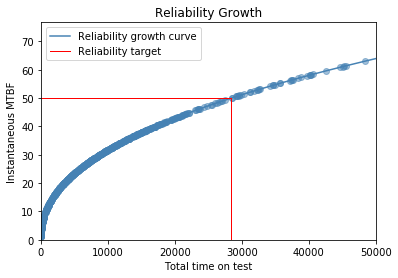

In [47]:
# 可靠性增长
from reliability.Repairable_systems import reliability_growth
import matplotlib.pyplot as plt
times = list(data_y['部件本次装机使用小时'])
reliability_growth(times=times,target_MTBF=50,label='Reliability growth curve',xmax=50000)
plt.legend()

plt.show()

In [ ]:
概率密度函数（PDF），
累积分布函数（CDF），
生存函数（SF）[也称为可靠性函数]，
危险函数（HF），
累积危险函数（CHF）。

In [82]:
##########################################################################################

In [306]:
from reliability.Fitters import Fit_Weibull_Mixture, Fit_Weibull_2P
from reliability.Distributions import Weibull_Distribution
import numpy as np
import matplotlib.pyplot as plt
#create some failures and right censored data
np.random.seed(2) #this is just for repeatability for this tutorial
group_1 = Weibull_Distribution(alpha=10,beta=2).random_samples(700)
group_2 = Weibull_Distribution(alpha=30,beta=3).random_samples(300)
all_data = np.hstack([group_1,group_2])
failures = []
censored = []
threshold = 30
for item in all_data:
    if item>threshold:
        censored.append(threshold)
    else:
        failures.append(item)

In [312]:
censored
failures

[7.567641566364087,
 1.6207480021429097,
 8.931729553707076,
 7.5597639982840406,
 7.384859633903746,
 6.332277823554495,
 4.785094483956956,
 9.826837510854212,
 5.968096365346054,
 5.5711216446445535,
 9.851762568316595,
 8.678703341198759,
 3.801845309895777,
 8.489281291083689,
 4.515308631712344,
 12.404343167390039,
 13.870758606127767,
 8.256432506446668,
 13.691075006271818,
 2.8809083999773577,
 8.388651809411185,
 2.5983690741376875,
 7.475494431203362,
 3.1861165578272095,
 3.6878582345011264,
 9.529884201864059,
 5.061609528294769,
 3.363151440454746,
 4.9885269323007835,
 6.561369506111681,
 7.941740390711335,
 4.746840651337673,
 10.113266922671533,
 8.123099728762897,
 8.388538925569076,
 6.994392309939168,
 12.562327519847866,
 9.31402446562862,
 4.208248623753466,
 10.98400553624553,
 18.27474348501292,
 8.325646539700077,
 14.842241571555734,
 6.465008630845041,
 9.150685573506843,
 7.4687537916988145,
 7.576455902534217,
 12.241767477890006,
 8.757956474306708,
 17.5

Parameters: 
Alpha 1: 8.488498524353037 
Beta 1: 2.4686085806507174 
Alpha 2: 20.811090057526982 
Beta 2: 1.586206515005321 
Proportion 1: 0.4083455157409234


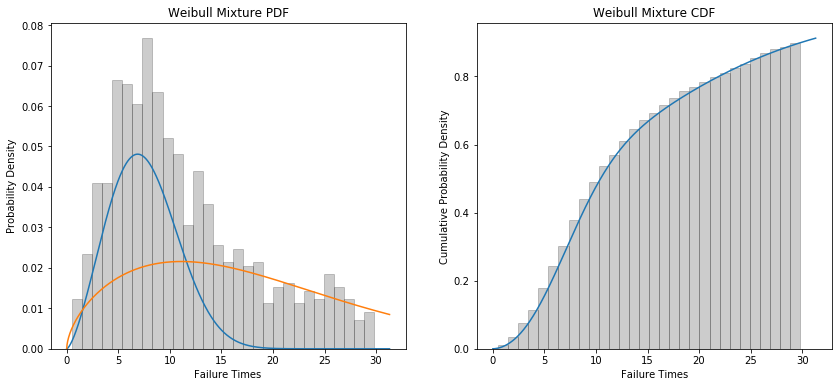

In [315]:
mixture = Fit_Weibull_Mixture(failures=failures,right_censored=censored)


Results from Fit_Weibull_2P (95% CI):
           Point Estimate  Standard Error   Lower CI   Upper CI
Parameter                                                      
Alpha           18.018538        0.435565  17.184755  18.892776
Beta             1.341940        0.033690   1.277508   1.409622


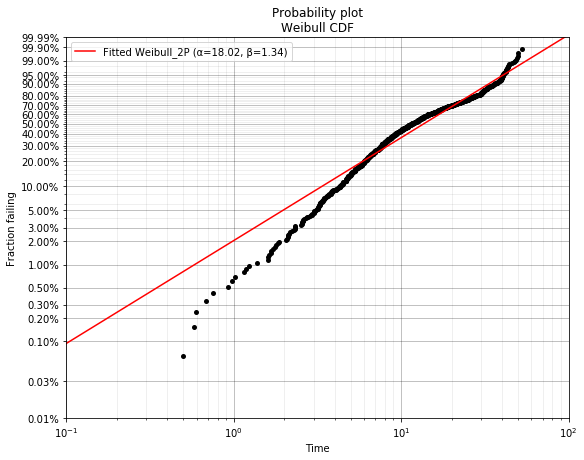

In [317]:
single = Fit_Weibull_2P(failures=all_data,right_censored=censored)

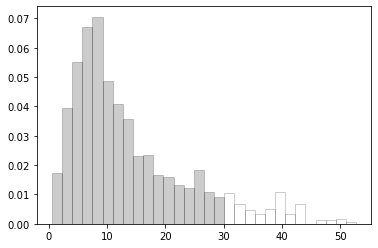

In [320]:
N,bins,patches = plt.hist(all_data, density=True, alpha=0.2, color='k', bins=30, edgecolor='k')
for i in range(np.argmin(abs(np.array(bins)-threshold)),len(patches)): #this is to shade the censored part of the histogram as white
    patches[i].set_facecolor('white')

In [321]:
xvals = np.linspace(0,60,1000)
part_1 = Weibull_Distribution(alpha=mixture.alpha_1,beta=mixture.beta_1).PDF(xvals=xvals,show_plot=False)
part_2 = Weibull_Distribution(alpha=mixture.alpha_2,beta=mixture.beta_2).PDF(xvals=xvals,show_plot=False)
Mixture_PDF = part_1*mixture.proportion_1+part_2*mixture.proportion_2

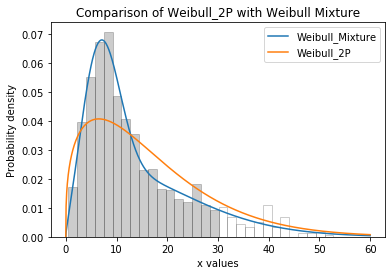

In [324]:
N,bins,patches = plt.hist(all_data, density=True, alpha=0.2, color='k', bins=30, edgecolor='k')
for i in range(np.argmin(abs(np.array(bins)-threshold)),len(patches)): #this is to shade the censored part of the histogram as white
    patches[i].set_facecolor('white')
    
plt.plot(xvals,Mixture_PDF,label='Weibull_Mixture')
Weibull_Distribution(alpha=single.alpha,beta=single.beta).PDF(xvals=xvals,label='Weibull_2P')
plt.title('Comparison of Weibull_2P with Weibull Mixture')
plt.legend()
plt.show()

In [325]:
print('Weibull_Mixture BIC:',mixture.BIC,'\nWeibull_2P BIC:',single.BIC)


Weibull_Mixture BIC: 6422.218064588051 
Weibull_2P BIC: 7571.421530478931


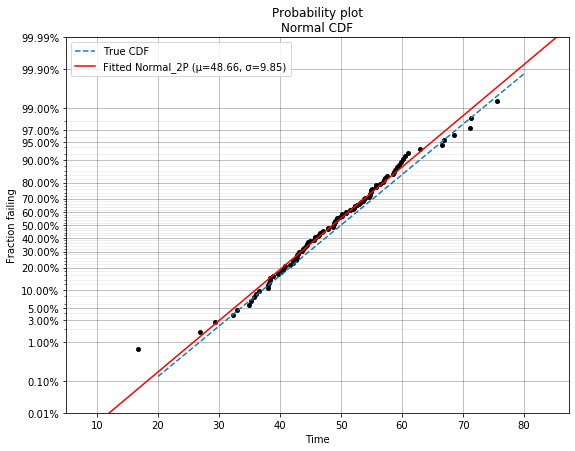

In [333]:
from reliability.Distributions import Normal_Distribution
from reliability.Probability_plotting import Normal_probability_plot
import matplotlib.pyplot as plt
dist = Normal_Distribution(mu=50,sigma=10)
dist.CDF(linestyle='--',label='True CDF')
failures = dist.random_samples(100)
Normal_probability_plot(failures=failures)
plt.show()


In [ ]:
################################################################################################

In [ ]:
# 可修复系统
# http://www.reliawiki.org/index.php/Repairable_Systems_Analysis

# 可修复系统介绍
# http://www.reliawiki.org/index.php/Introduction_to_Repairable_Systems#Preventive_Maintenance_2

# 已经下载的pdf文件 ‘基于寿命预测的预防性维护维修策略’

# 可靠性理论与预防性维护

### 预防性维护 最佳更换时间实现
计划性维修当中，需要优化预防性维护（PM）的频率，以使总成本降至最低。
如果PM的执行频率太高，那么我们将付出高昂的代价，但如果执行的频率不够高，则会导致失败，并导致纠正性维护（CM）的成本更高。
根据潜在的故障分布，可以在一定范围的PM间隔中对这些成本进行建模，而最佳更换时间可以使单位时间成本最低。

In [38]:
# 可修复系统介绍
# http://www.reliawiki.org/index.php/Introduction_to_Repairable_Systems#Preventive_Maintenance_2

# 预防性维护是指什么
# http://www.sohu.com/a/239036675_99953647http://www.sohu.com/a/239036675_99953647

# 基于可靠度限制的周期性预防维护模型研究
# https://www.ixueshu.com/document/c5951ac9594994eec40192f6199eed29318947a18e7f9386.html
  
# 一种基于可靠度约束的分阶段等周期预防性维修模型研究
# https://www.ixueshu.com/document/a2971426630cc04e9e908a3c0d3d464d.html

# https://www.ixueshu.com/document/f5dcb958f7484e2a.html

optimal_replacement_time(cost_PM, cost_CM, weibull_alpha, weibull_beta, show_plot=True, print_results=True, q=0, **kwargs)

'''    
Calculates the cost model to determine how cost varies with replacement time.
The cost model may be HPP (good as new replacement) or NHPP (as good as old replacement). Default is HPP.
''' 

Inputs:
- Cost_PM - cost of preventative maintenance (must be smaller than Cost_CM)
- Cost_CM - cost of corrective maintenance (must be larger than Cost_PM)
- weibull_alpha - scale parameter of the underlying Weibull distribution
- weibull_beta - shape parameter of the underlying Weibull distribution. Should be greater than 1 otherwise conducting PM is not economical.
- q - restoration factor. q=1 is Power Law NHPP (as good as old), q=0 is HPP (as good as new). Default is q=0 (as good as new).
- show_plot - True/False. Defaults to True. Other plotting keywords are also accepted and used.
- print_results - True/False. Defaults to True

Outputs:
- ORT - the optimal replacement time
- min_cost - the minimum cost per unit time
- Plot of cost model if show_plot is set to True. Use plt.show() to display it.
Printed results if print_results is set to True.

Cost model assuming as good as new replacement (q=0):
The minimum cost per unit time is 0.88 
The optimal replacement time is 333.62


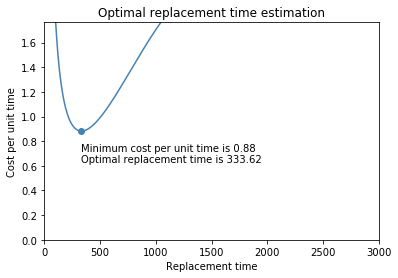

In [3]:
from reliability.Repairable_systems import optimal_replacement_time
import matplotlib.pyplot as plt
optimal_replacement_time(cost_PM=175, cost_CM=2005, weibull_alpha=1000, weibull_beta=2.5,q=0)
plt.show()

Cost model assuming as good as new replacement (q=0):
The minimum cost per unit time is 0.14 
The optimal replacement time is 4380.32


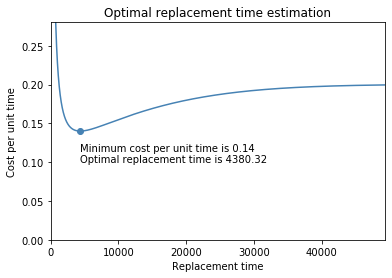

In [81]:
from reliability.Repairable_systems import optimal_replacement_time
import matplotlib.pyplot as plt
optimal_replacement_time(cost_PM=175, cost_CM=3000, weibull_alpha=16456.1, weibull_beta=1.4169, q=0)
plt.show()

In [1]:
16456.1*1.4169

23316.64809

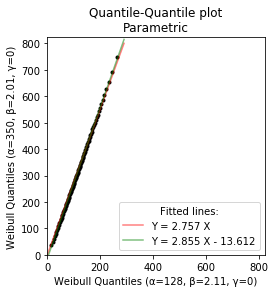

In [363]:
from reliability.Probability_plotting import QQ_plot_parametric
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
Field = Weibull_Distribution(alpha=350,beta=2.01)
Lab = Weibull_Distribution(alpha=128,beta=2.11)
QQ_plot_parametric(X_dist=Lab, Y_dist=Field)
plt.show()

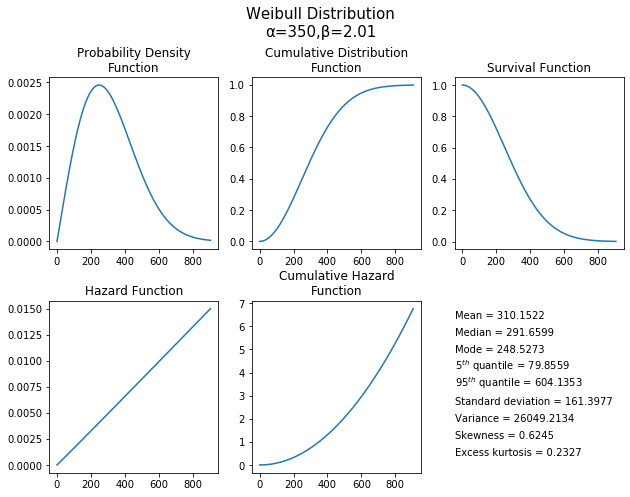

In [368]:
Field = Weibull_Distribution(alpha=350,beta=2.01)
Field.plot()

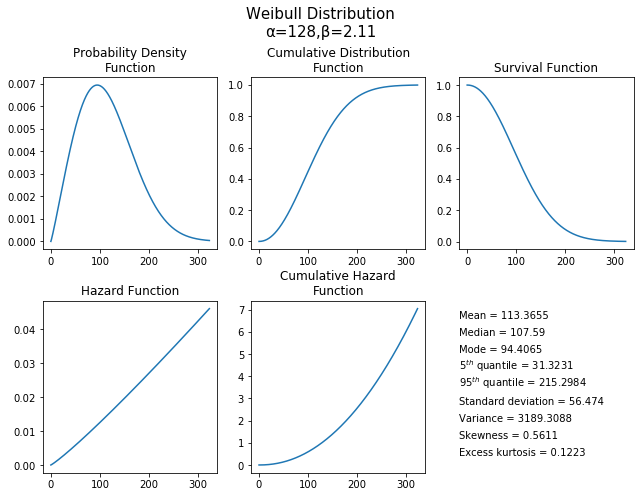

In [369]:
Lab = Weibull_Distribution(alpha=128,beta=2.11)
Lab.plot()

[2.757038978346966, 2.854829805511118, -13.611854422363834]

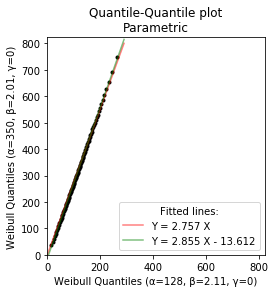

In [370]:
QQ_plot_parametric(X_dist=Lab, Y_dist=Field)

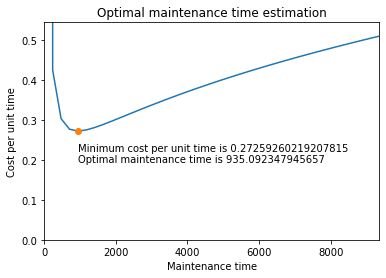

In [79]:
C=0.27259260219207815
T=935.092347945657
eta=16456.1
beta=1.4169
tt = np.linspace(1, eta * beta, 100)
cost=[75.01110773788267, 0.42557295855201493, 0.30356797841590666, 0.27727350415258445,
      0.27259667212908895, 0.2755082453458726, 0.2816282312637187, 0.2892183822378656, 0.29748430872886367,
      0.3060288803957435, 0.31464182134699825, 0.32320801979232555, 0.3316637526581488, 0.3399742772072252,
      0.3481217170249872, 0.35609822303194755, 0.36390197642720096, 0.3715347873242607, 0.37900062069421436,
      0.38630467692810144, 0.39345281219668815, 0.400451171201108, 0.4073059548713436, 0.4140232749292127, 
      0.4206090649099831, 0.42706902811110553, 0.4334086097539045, 0.4396329849900624, 0.44574705719640934,
      0.4517554628442305, 0.45766258045058894, 0.463472541936431, 0.4691892452675561, 0.4748163676288445,
      0.4803573786375058, 0.4858155532758396, 0.4911939843436787, 0.4964955943125294, 0.5017231465191491, 
      0.5068792556739182, 0.5119663976844006, 0.5169869188107836, 0.5219430441801102, 0.5268368856922302, 
      0.5316704493535325, 0.5364456420756787, 0.5411642779764035, 0.5458280842184362, 0.5504387064210381,
      0.5549977136767875, 0.5595066032042046, 0.5639668046647298, 0.5683796841704936, 0.5727465480073096,
      0.5770686460954099, 0.5813471752086283, 0.5855832819710516, 0.5897780656485894, 0.5939325807514568, 
      0.5980478394622308, 0.6021248139029111, 0.6061644382532896, 0.6101676107319071, 0.6141351954499265, 
      0.6180680241473987, 0.6219668978206121, 0.6258325882484951, 0.6296658394253981, 0.6334673689069746,
      0.6372378690753476, 0.640978008329245, 0.6446884322043389, 0.6483697644286088, 0.6520226079171727, 
      0.6556475457106804, 0.6592451418610582, 0.6628159422680907, 0.6663604754700754, 0.6698792533915325, 
      0.6733727720507406, 0.676841512229651, 0.6802859401085645, 0.6837065078677651, 0.6871036542581617, 
      0.6904778051428317, 0.6938293740112352, 0.6971587624677419, 0.7004663606959981, 0.7037525479005589, 0.7070176927271133, 0.7102621536625393, 0.7134862794159436, 0.7166904092817686, 0.7198748734859701, 0.7230399935162124, 0.7261860824369615, 0.7293134451903022, 0.7324223788832527, 0.7355131730623028, 0.738586109975856]

fig = plt.figure()
plt.plot(tt, cost)
plt.plot(T, C, 'o')
text_str = str('\nMinimum cost per unit time is ' + str(C) +
               '\nOptimal maintenance time is ' + str(T))
plt.text(T, C, text_str, verticalalignment='top')
plt.xlabel('Maintenance time')
plt.ylabel('Cost per unit time')
plt.title('Optimal maintenance time estimation')
plt.ylim([0, C * 2])
plt.xlim([0, 10*T])

plt.show()


In [4]:
import sympy
from sympy import E, oo
def tcap(eta, beta, theta, lamb_e):
    """时间间隔上限"""
    t = eta * (sympy.log((1 - theta / lamb_e) ** (-1))) ** (1 / beta)
    return t
tcap(16456.1, 1.4196,1000,12300)

2893.68316225215

In [604]:
def failure_rate(T, eta, beta):
    """某个零件出故障的概率，在 T 时"""
    p = 1 - abs((E ** (- ((T + 1) / eta)) ** beta) / (E ** (- (T / eta)) ** beta))
    return p

p = failure_rate(154, 16456.1, 1.4196)
p = abs(p)
p

3.04032493969597e-6

In [548]:
mean, var, skew, kurt = binom.stats(1000,3.04032493969597e-6 , moments='mvsk')
mean

array(0.00304032)

In [549]:
var

array(0.00304032)

In [550]:
skew

array(18.13585431)

In [551]:
kurt

array(328.90721164)

In [149]:
from scipy.stats import binom
rv = binom(2000, p)
rv

In [150]:
#求对应分布的概率:概率质量函数 (PMF)
binom.pmf(1,2000, 3.04032493969597e-6)

0.006043806082108286

In [151]:
rv.pmf(1)

6.906143947737371e-15

In [843]:
def failure_rate(T, eta, beta):
    """某个零件出故障的概率，在 T 时"""
    p = 1 - abs((numpy.exp(1) ** (- ((T + 1) / eta)) ** beta) / (numpy.exp(1) ** (- (T / eta)) ** beta))
    return p

p = failure_rate(154, 16456.1, 1.4196)
print(p)

rv = binom.pmf(1, 20, p)
print(rv)

3.040324939695971e-06
6.080298633125074e-05


In [779]:
p = failure_rate(15400, 16456.1, 1.4196)
print('%.16f' %p)
rv = binom.pmf(2, 20, p)
print('%.16f' %rv)

0.0000209667691268
0.0000000834935106


In [844]:
p = failure_rate(15400, 16456.1, 1.4196)
print('%.16f' %p)
rv = binom.pmf(3, 20, p)
print('%.16f' %rv)

0.0000209667691268
0.0000000000105038


In [845]:
p = failure_rate(1540, 16456.1, 1.4196)
print(p)
rv = binom.pmf(3, 20, p)
print(rv)

7.979718496642363e-06
5.791734557377631e-13


In [147]:
import numpy
def failure_rate(T, eta, beta):
    """某个零件出故障的概率，在 T 时"""
    # t = 900 表示900小时周期，坏掉k个以上的概率
    p = 1 - abs(numpy.exp(1) ** (- (T + 900) / eta) ** beta) / abs(numpy.exp(1) ** (- (T / eta)) ** beta)
    return p

p = failure_rate(13500, 16456.1, 1.4196)
# print(p)
li = []
li_ = []
li_1 = []
N=200
for j in range(10):
    li_1.append(j)
    li = []
    for i in range(j+1, N+1):
        li.append(binom.pmf(i, N, p))
    sop = sum(li)
    li_.append(float('%.16f' %sop))
# print(li)
print(li_)
print(li_1)



[0.9732296845971533, 0.8754262211657995, 0.6976604808546849, 0.4833404554574748, 0.2905259345562702, 0.1524568150329522, 0.0704876205965908, 0.0289898173115645, 0.0107019450165932, 0.0035751765400827]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [141]:
li=[]
li_=[]
for i in range(0, 11):
    li_.append(i)
    li.append(binom.pmf(i+1, N, p))
print(sum(li))


0
1
2
3
4
5
6
7
8
9
10
0.8363833631269564


In [140]:
binom.pmf(4, 100, p)

0.07143836554482516

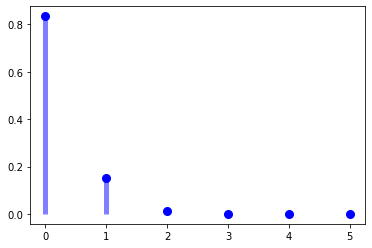

In [10]:
# from scipy.stats import binom
# binom.pmf(2, 100, 0.015907432430924184)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
p = failure_rate(13500, 16456.1, 1.4196)
rv = binom(10, p)
x = [0,1,2,3,4,5]
# rv.pmf(x)
ax.plot(x, binom.pmf(x, 10, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, 10, p), colors='b', lw=5, alpha=0.5)
# ax.legend(loc='best', frameon=False)
plt.show()

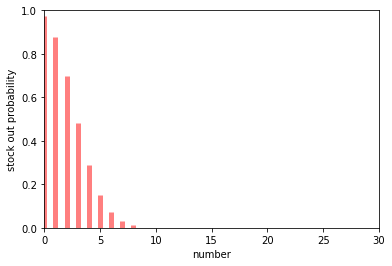

In [148]:
from scipy.stats import binom
fig, ax = plt.subplots(1,1)

x=li_1
for i in range(len(li_1)-1):
    ax.plot()#li_1[i], li_[i], 'bo', ms=8, label='binom pmf'
    ax.vlines(li_1[i], 0,li_[i], colors='r', lw=5, alpha=0.5)
# ax.legend(loc='best', frameon=False)
plt.ylim([0, 1])
plt.xlim([0, 30])
plt.xlabel('number')
plt.ylabel('stock out probability')
plt.show()

In [832]:
j=[1,2,3,4,5,6]
j[0]=0
j.insert(0,9)
j
li_.insert(0,float(1))
li_

[1.0,
 1.7710892643898225e-08,
 9.370156530082779e-13,
 3.253312015015464e-17,
 7.745498343187313e-22,
 1.2805938866617333e-26]

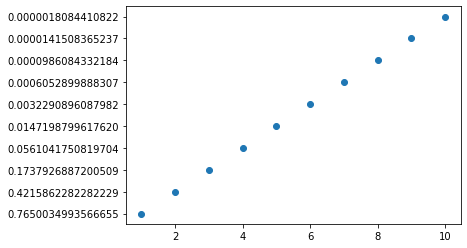

In [933]:
j=[1,2,3,4,5]
plt.scatter(li_1, li_)
plt.show()

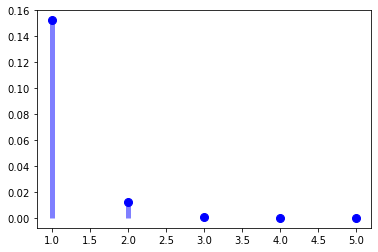

In [1000]:
fig, ax = plt.subplots(1, 1)
p = failure_rate(13500, 16456.1, 1.4196)
rv = binom(10, p)
x = [1,2,3,4,5]
# rv.pmf(x)
ax.plot(x, binom.pmf(x, 10, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, 10, p), colors='b', lw=5, alpha=0.5)
# ax.legend(loc='best', frameon=False)
# plt.show()

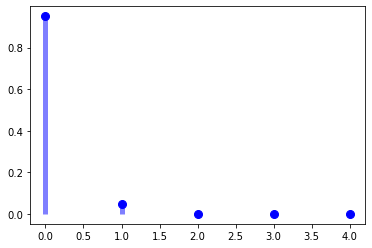

In [940]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.01
# x = np.arange(binom.ppf(0.01, n, p),
#               binom.ppf(0.99, n, p))
x=[0,1,2,3,4]
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [899]:
def hazard_function(t, eta, beta):
    hf = (beta / eta) * (t / eta) ** (beta - 1)
    return hf
p=hazard_function(185, 16456.1, 1.4196)
print('%.16f' %p)
rv = binom.pmf(1, 2000, p)
print(rv)
print('%.16f' %rv)

0.0000131212000036
0.02556302503085089
0.0255630250308509


In [728]:
li = []
li_ = []
N=10
j=5
for i in range(j+1, N+1):
    li.append(binom.pmf(i, 10, p))
stock_out_probability = sum(li)
# li_.append(stock_out_probability)
print(li)
print(stock_out_probability)
# print(li_)

[4.04343626571008e-27, 3.782796293328882e-32, 2.3224406481440543e-37, 8.449529213067682e-43, 1.383352672146491e-48]
4.043474093905258e-27


In [114]:
import numpy
type(numpy.exp(1))

numpy.float64

In [996]:
type(p)
print(p)

0.017939445626970252


In [704]:
type(p)
binom.pmf(1,2000, p)

0.09869968069730531

In [641]:
p = 3.04032493969597e-6
binom.pmf(1,2000, p)

0.006043806082108286

In [632]:
p = 3.04032493969597e-6
binom.pmf(1, 2000, p)
type(p)

float

In [984]:
def stock_out_mean_time(k, N, eta, beta):
    
    t = eta * (-sympy.log(1 - k / N )) ** (1 / beta)
    return t

In [985]:
stock_out_mean_time(9,10,16456.1,1.4196)

29612.8538272392

In [986]:
stock_out_mean_time(k=3, N=80, eta=16456.1, beta=1.4196)

1650.70120148209

In [49]:
# def stock_out_mean_time(k, N, eta, beta):
#     t = eta * (-sympy.log(1 - k / N )) ** (1 / beta)
#     return t
import sympy
from sympy import E, oo
def stock_out_mean_time(k, N, eta, beta):
    
    t = eta * (-sympy.log(1 - (k+1) / N )) ** (1 / beta)
    return t
li_2 = []

for i in range(1,85):
    print(i)
    t=stock_out_mean_time(i, 85, 17053.51, 1.4665187)
#     a = round(t / 7.8)
    li_2.append(t)
li_2

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84


[1333.38394900107,
 1765.28744214814,
 2156.81861042805,
 2521.84284162660,
 2867.82368559052,
 3199.36540053983,
 3519.56496083920,
 3830.63538546396,
 4134.23094905535,
 4431.63251194042,
 4723.86040498072,
 5011.74687263024,
 5295.98456510442,
 5577.16015045422,
 5855.77830853599,
 6132.27929755399,
 6407.05210177754,
 6680.44446625914,
 6952.77069159496,
 7224.31778696945,
 7495.35040049552,
 7766.11482615627,
 8036.84230500599,
 8307.75178154044,
 8579.05223604163,
 8850.94468493432,
 9123.62392028481,
 9397.28004420711,
 9672.09984254364,
 9948.26803367343,
 10225.9684219152,
 10505.3849802020,
 10786.7028831322,
 11070.1095088710,
 11355.7954265056,
 11643.9553841940,
 11934.7893127101,
 12228.5033587024,
 12525.3109621239,
 12825.4339928298,
 13129.1039622910,
 13436.5633277563,
 13748.0669080501,
 14063.8834325914,
 14384.2972482403,
 14709.6102123489,
 15040.1438050580,
 15376.2414996538,
 15718.2714369289,
 16066.6294583286,
 16421.7425636439,
 16784.0728727167,
 17154.12218

In [48]:
stock_out_mean_time(84, 85, 17053.51, 1.4665187)

inf

In [46]:
import numpy as np
np.linspace(1, 84, 84)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84.])

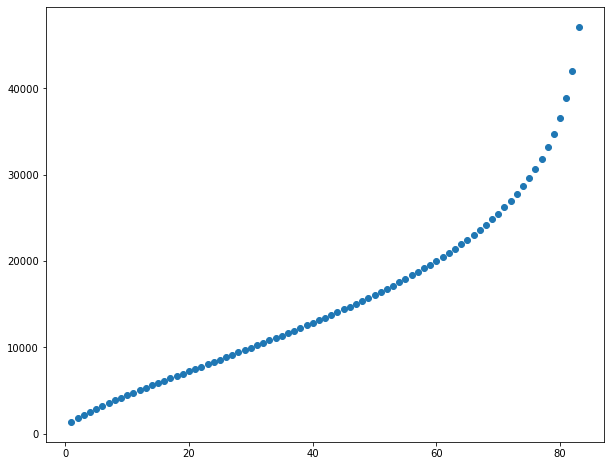

In [56]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
# plt.subplots(8, 8)
plt.figure(figsize=(10, 8))
li_=np.linspace(1, 84, 84)
len(li_2)
plt.scatter(li_, li_2)
plt.show()

In [698]:
sympy.log(0.000000001)

-20.7232658369464

In [679]:
1 - 1 / (10 + 1)

0.9090909090909091

In [699]:
1 - 10 / (10 + 10)

0.5

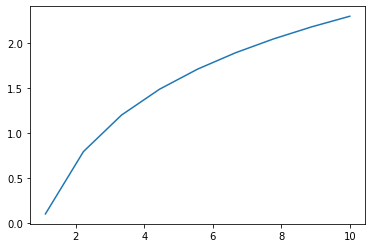

In [695]:
tt = np.linspace(0, 10, 10)
fig = plt.figure()
l =[]
for i in tt:
    l.append(sympy.log(i))
plt.plot(tt, l)
plt.show()

In [ ]:
    dict_data ={"partNumber":"12345","maintenanceType":"6","mtbf":"12300",
                "extra":"12300","tolerance":"0.003","hours":"0.3","rate":"60",
                "material":"10","components":"450","delay":"5000","cancel":"0",
                "materialOfFailure":"0","adjustment":"50000","grounding":"0",
                "transfer":"0","hoursOfFailure":"0.25","rateOfFailure":"60",
                "isSafe":"false","name":"test3","label":"test3"}

In [70]:
import numpy
def failure_rate(T, eta, beta):
    """某个零件出故障的概率，在 T 时"""
    # t = 900 表示900小时周期，坏掉k个以上的概率
    p = 1 - abs(numpy.exp(1) ** (- (T + 900) / eta) ** beta) / abs(numpy.exp(1) ** (- (T / eta)) ** beta)
    return p
p = failure_rate(10000, 16456.1, 1.4196)
print(p)
# li = []
# li_ = []
# li_1 = []
# N=100
# for j in range(10):
#     li_1.append(j+1)
#     li = []
# # #     k = j
#     for i in range(j+1, N+1):
#         li.append(binom.pmf(i, N, p))
# #     print(li)
#     sop = sum(li)
    
#     li_.append(float('%.16f' %sop))

0.015907432430924184


In [39]:
import numpy as np
tt = np.linspace(0, 100, 101)
tt

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [75]:
x=np.linspace(0, 100000, 21)
x

array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
        35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
        70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.])

In [97]:
100000/7.8/30/12  # >>>>35年

35.612535612535616

In [99]:
x=np.linspace(0, 100000, 21)
for j in x:
    p = failure_rate((float(j)), 16456.1, 1.4196)
    tt = np.linspace(0, 100, 101)
    li=[]
    for i in range(len(tt)):
        li.append(binom.pmf(i, 100, p))
#         print(li)
#         print(sum(li))
        if sum(li)>0.9 or sum(li)==0.9:
            print(i)
            break

1
3
3
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
6
7
7


In [157]:
x=np.linspace(0, 100000, 21)
x

array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
        35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
        70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.])

In [155]:
x=np.linspace(0, 100000, 101)
x

array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
         7000.,   8000.,   9000.,  10000.,  11000.,  12000.,  13000.,
        14000.,  15000.,  16000.,  17000.,  18000.,  19000.,  20000.,
        21000.,  22000.,  23000.,  24000.,  25000.,  26000.,  27000.,
        28000.,  29000.,  30000.,  31000.,  32000.,  33000.,  34000.,
        35000.,  36000.,  37000.,  38000.,  39000.,  40000.,  41000.,
        42000.,  43000.,  44000.,  45000.,  46000.,  47000.,  48000.,
        49000.,  50000.,  51000.,  52000.,  53000.,  54000.,  55000.,
        56000.,  57000.,  58000.,  59000.,  60000.,  61000.,  62000.,
        63000.,  64000.,  65000.,  66000.,  67000.,  68000.,  69000.,
        70000.,  71000.,  72000.,  73000.,  74000.,  75000.,  76000.,
        77000.,  78000.,  79000.,  80000.,  81000.,  82000.,  83000.,
        84000.,  85000.,  86000.,  87000.,  88000.,  89000.,  90000.,
        91000.,  92000.,  93000.,  94000.,  95000.,  96000.,  97000.,
        98000.,  990

x:[0.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 17000.0, 18000.0, 19000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 25000.0, 26000.0, 27000.0, 28000.0, 29000.0, 30000.0, 31000.0, 32000.0, 33000.0, 34000.0, 35000.0, 36000.0, 37000.0, 38000.0, 39000.0, 40000.0, 41000.0, 42000.0, 43000.0, 44000.0, 45000.0, 46000.0, 47000.0, 48000.0, 49000.0, 50000.0, 51000.0, 52000.0, 53000.0, 54000.0, 55000.0, 56000.0, 57000.0, 58000.0, 59000.0, 60000.0, 61000.0, 62000.0, 63000.0, 64000.0, 65000.0, 66000.0, 67000.0, 68000.0, 69000.0, 70000.0, 71000.0, 72000.0, 73000.0, 74000.0, 75000.0, 76000.0, 77000.0, 78000.0, 79000.0, 80000.0, 81000.0, 82000.0, 83000.0, 84000.0, 85000.0, 86000.0, 87000.0, 88000.0, 89000.0, 90000.0, 91000.0, 92000.0, 93000.0, 94000.0, 95000.0, 96000.0, 97000.0, 98000.0, 99000.0, 100000.0]
y:[1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5

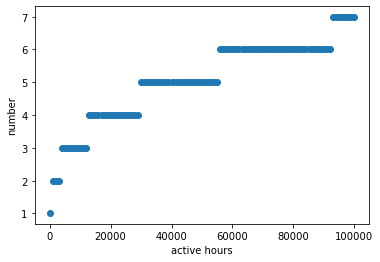

In [156]:
x=np.linspace(0, 100000, 101)
li_=[]
li_1=[]
for j in x:
    li_.append(j)
    p = failure_rate((float(j)), 16456.1, 1.4196)
    tt = np.linspace(0, 100, 101)
    li=[]
    for i in range(len(tt)):
        li.append(binom.pmf(i, 100, p))
#         print(li)
#         print(sum(li))
        if sum(li)>0.9:
#             print(i)
            li_1.append(i)
            break
print("x:" + str(li_))
print("y:" + str(li_1))
plt.scatter(li_, li_1)
plt.xlabel('active hours')
plt.ylabel('number')
plt.show()

In [19]:
print(binom.pmf(0, 100, p))
print(binom.pmf(1, 5, p))
print(binom.pmf(2, 5, p))
print(binom.pmf(3, 5, p))
print(binom.pmf(4, 5, p))
print(binom.pmf(5, 5, p))

0.1636163665492559
0.08343189199486806
0.0030481254609655553
5.5680559337896647e-05
5.085625129089903e-07
1.8579973521227005e-09


In [111]:
for i in range(2,10):
    print(i)

2
3
4
5
6
7
8
9


### test 8873477

In [77]:
from reliability.Nonparametric import KaplanMeier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pa = "..\\data_excel\\data\\887477-EMDP.csv"
data1 = pd.read_csv(pa, encoding = "utf-8")
print(data1.shape)
data1["部件本次装机使用小时"] = data1["部件本次装机使用小时"].str.split(':').str[0].astype(int)
data1 = data1[data1["部件本次装机使用小时"]>0]
data1["IsPlanned"] = data1["非计划"]=="X"
data_y = data1[["IsPlanned", "部件本次装机使用小时"]]

data1["IsPlaneNew"] = data1["部件装上飞行小时数"]=="00:00"
data1["IsPartNew"] = data1["部件装上使用小时数"]=="00:00"
def CheckNew(p1,p2):
    if p1 and p2:
        return "PlaneNew-PartNew"
    elif p1 and not p2:
        return "PlaneNew-PartOld"
    elif not p1 and p2:
        return "PlaneOld-PartNew"
    elif not p1 and not p2:
        return "PlaneOld-PartOld"

data1["PlanePartType"] = [CheckNew(row["IsPlaneNew"], row["IsPartNew"]) for idx, row in data1.iterrows()]

data1["安装日期"] = pd.to_datetime(data1["安装日期"])
data1["安装年度"] = data1["安装日期"].dt.year

di = {"霍尼韦尔": "HONEYWELL"}
data1.replace({"最近送修公司": di}, inplace=True)
data1["最近送修公司"].fillna("Unknown", inplace=True)

data1["FH TSN"].fillna("00:00", inplace=True)
data1["部件装上飞行小时数"] = data1["部件装上飞行小时数"].str.split(':').str[0].astype(int)
data1["部件装上使用小时数"] = data1["部件装上使用小时数"].str.split(':').str[0].astype(int)

data1["部件装上飞行小时数-Range"] = pd.cut(data1['部件装上飞行小时数'], 8)
data1["部件装上使用小时数-Range"] = pd.cut(data1['部件装上使用小时数'], 8)
data1["CY TSN-Range"] = pd.cut(data1['CY TSN'], 8)
data1["FH TSN-Range"] = pd.cut(data1['FH TSN'], 8)

data_x = data1[["机型","安装年度","部件装上飞行小时数-Range","部件装上使用小时数-Range","FH TSN-Range", "最近送修公司",
                "PlanePartType"]]

# 含有故障零件和未损坏零件
display(data_x)
display(data_y)
data1.shape

(50, 35)


,机型,安装年度,部件装上飞行小时数-Range,部件装上使用小时数-Range,FH TSN-Range,最近送修公司,PlanePartType
0,73C,2007,"(34620.625, 41544.75]","(-53.629, 6703.625]","(44515.13, 53416.53]",武汉航达,PlaneOld-PartOld
1,73C,2006,"(34620.625, 41544.75]","(-53.629, 6703.625]","(44515.13, 53416.53]",武汉航达,PlaneOld-PartOld
2,73C,2008,"(34620.625, 41544.75]","(46925.375, 53629.0]","(-63.081, 8909.53]",武汉航达,PlaneOld-PartOld
3,73C,2012,"(41544.75, 48468.875]","(13407.25, 20110.875]","(44515.13, 53416.53]",武汉航达,PlaneOld-PartOld
4,73N,2014,"(41544.75, 48468.875]","(26814.5, 33518.125]","(62317.93, 71219.33]",武汉航达,PlaneOld-PartOld
5,73N,2012,"(-55.393, 6924.125]","(-53.629, 6703.625]","(8909.53, 17810.93]",Unknown,PlaneNew-PartNew
6,73N,2015,"(-55.393, 6924.125]","(-53.629, 6703.625]","(8909.53, 17810.93]",Unknown,PlaneNew-PartNew
7,73N,2012,"(-55.393, 6924.125]","(-53.629, 6703.625]","(62317.93, 71219.33]",Unknown,PlaneNew-PartNew
8,73N,2000,"(-55.393, 6924.125]","(-53.629, 6703.625]","(17810.93, 26712.33]",Unknown,PlaneNew-PartNew
9,73N,2004,"(6924.125, 13848.25]","(6703.625, 13407.25]","(8909.53, 17810.93]",Unknown,PlaneOld-PartOld


,IsPlanned,部件本次装机使用小时
0,False,7523
1,True,2276
2,True,550
3,True,1253
4,True,927
5,True,15798
6,True,6875
7,True,16232
8,True,11047
9,True,2840


(49, 44)

In [78]:
# 所有故障数据(不止第一次坏掉的)
failures = data_y.loc[data_y["IsPlanned"] == True, ]
failures = np.array(failures["部件本次装机使用小时"])
print(failures.shape)
failures

(45,)


array([ 2276,   550,  1253,   927, 15798,  6875, 16232, 11047,  2840,
        1412,  6181,   429,  2548, 16410,   436, 18061, 36151,   627,
       51337,   575,  9907,  3088,  7805, 36764, 13689, 17031, 51198,
       55014,  1519,   537,   256,  4016,  4271,  4437, 13456, 14723,
           8, 15679,  8352, 44027, 15339, 53365, 53629,  7318,  4976])

                  Alpha      Beta  Gamma       Mu    Sigma       Lambda     AICc      BIC
Distribution                                                                             
Gamma_3P        25964.1  0.540926  7.991                                 939.086  942.414
Weibull_3P      11126.1  0.674965  7.991                                 941.028  944.355
Gamma_2P        22989.7  0.611259                                        944.961  948.289
Weibull_2P      11572.7  0.723491                                        945.238  948.565
Exponential_2P                         8                    7.12015e-05  951.593  953.306
Exponential_1P                                               7.1161e-05  951.644  953.358
Lognormal_2P                               8.5425  1.80032               953.732  957.059
Normal_2P                                 14052.6  16858.2               1007.92  1011.25


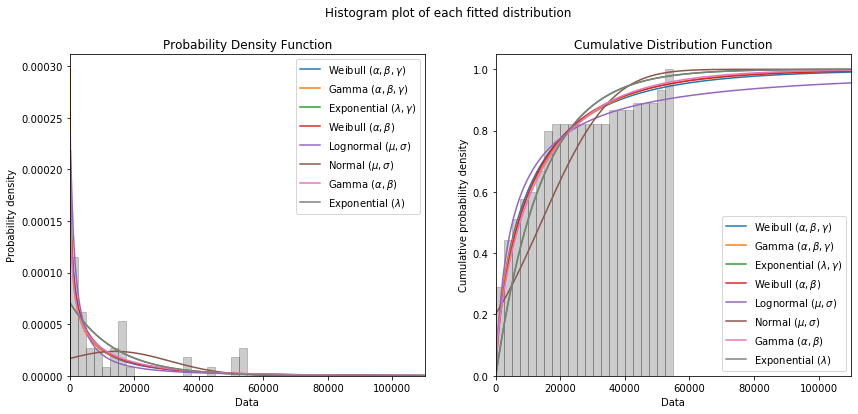

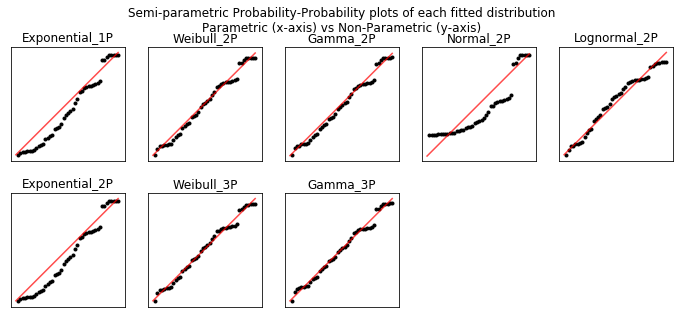

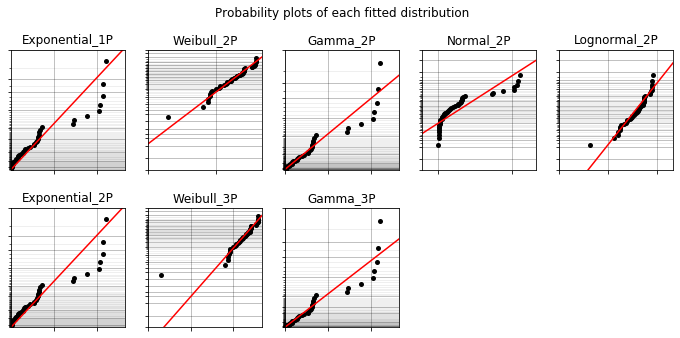

The best fitting distribution was Gamma_3P which had parameters [2.59641123e+04 5.40925655e-01 7.99100000e+00]


In [79]:
# 无删失数据的分布函数
from reliability.Fitters import Fit_Everything
results=Fit_Everything(failures=failures)
print('The best fitting distribution was',results.best_distribution_name,'which had parameters',results.best_distribution.parameters)


In [67]:
pa = "..\\data_excel\\data\\887477-EMDP.csv"
data1 = pd.read_csv(pa, encoding = "utf-8")
data1["部件本次装机使用小时"] = data1["部件本次装机使用小时"].str.split(':').str[0].astype(int)
data1 = data1[data1["部件本次装机使用小时"]>0]
data1["IsPlanned"] = data1["非计划"]=="X"
data_y = data1[["IsPlanned", "部件本次装机使用小时"]]

data1["IsPlaneNew"] = data1["部件装上飞行小时数"]=="00:00"
data1["IsPartNew"] = data1["部件装上使用小时数"]=="00:00"
data1.shape

(49, 38)

In [68]:
da = data1[["部件本次装机使用小时","IsPartNew","IsPlanned"]]
da

,部件本次装机使用小时,IsPartNew,IsPlanned
0,7523,False,False
1,2276,False,True
2,550,False,True
3,1253,False,True
4,927,False,True
5,15798,True,True
6,6875,True,True
7,16232,True,True
8,11047,True,True
9,2840,False,True


In [69]:
# 第一次使用的零件（新零件）
first = da.loc[da["IsPartNew"] == True, ]
first.shape

(19, 3)

In [70]:
# 第一次出现故障的零件
ffail = first.loc[first["IsPlanned"] == True,]
ffail = np.array(ffail["部件本次装机使用小时"])
ffail.shape

(18,)

In [73]:
# 第一次使用的新零件，还未出故障
censored = first.loc[first["IsPlanned"] == False,]
censored = np.array(censored["部件本次装机使用小时"])
censored.shape

(1,)

                  Alpha      Beta    Gamma       Mu    Sigma       Lambda     AICc      BIC
Distribution                                                                               
Gamma_3P        44626.6  0.571737  1411.99                                 401.358  402.339
Exponential_2P                        1412                    3.91931e-05  403.542  404.183
Weibull_3P      23431.9  0.763481  1411.99                                 404.201  405.182
Exponential_1P                                                3.71379e-05  405.481  406.122
Weibull_2P      29085.8     1.299                                          406.394  407.375
Gamma_2P        18784.3   1.43347                                          406.744  407.725
Lognormal_2P                                9.81316  1.00793                409.44  410.421
Normal_2P                                   26926.7  19510.7               411.516  412.496


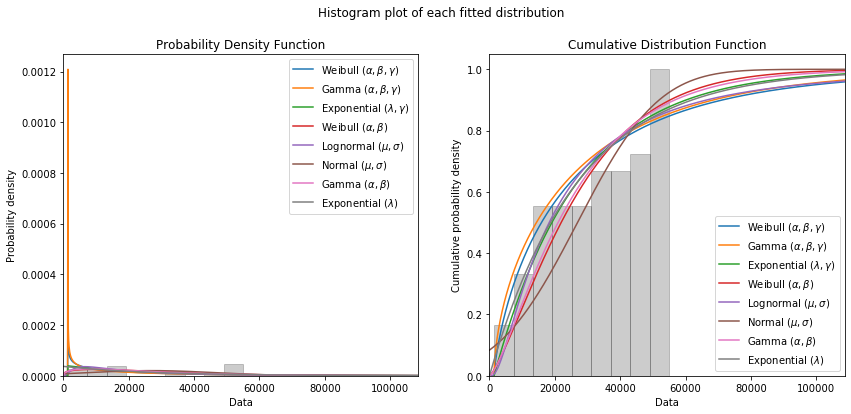

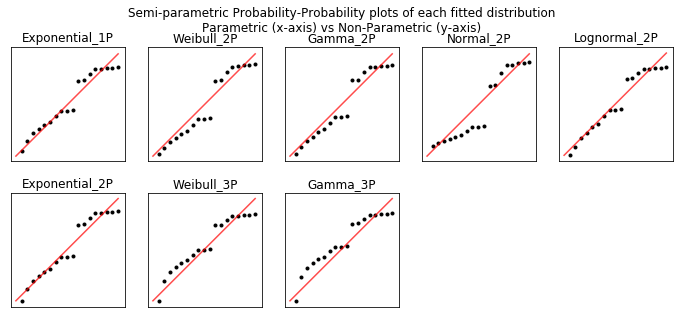

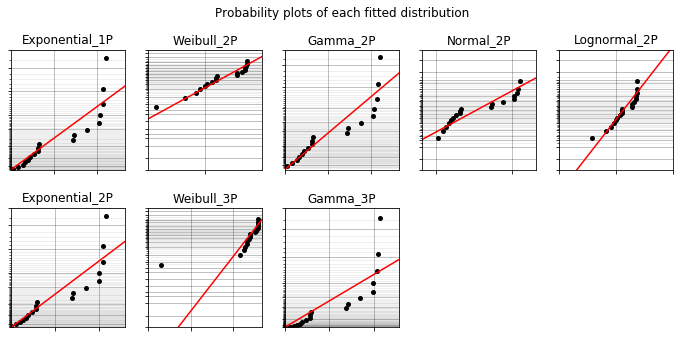

In [74]:
from reliability.Fitters import Fit_Everything
results=Fit_Everything(failures=ffail)

                  Alpha      Beta    Gamma       Mu    Sigma       Lambda     AICc      BIC
Distribution                                                                               
Gamma_3P        45057.9  0.600307  1411.99                                 404.808  405.947
Exponential_2P                        1412                    3.54495e-05  407.138  407.847
Weibull_3P      26316.8  0.746778  1411.99                                 407.463  408.602
Exponential_1P                                                3.36703e-05  408.992  409.701
Weibull_2P      31396.5   1.27184                                          410.151   411.29
Gamma_2P          21244   1.38233                                          410.441   411.58
Lognormal_2P                                  9.896  1.04836                412.88  414.019
Normal_2P                                   28694.1  20523.1               415.466  416.605


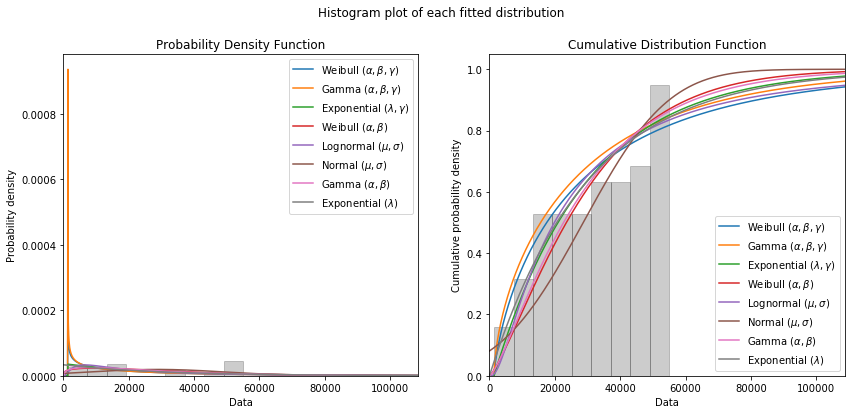

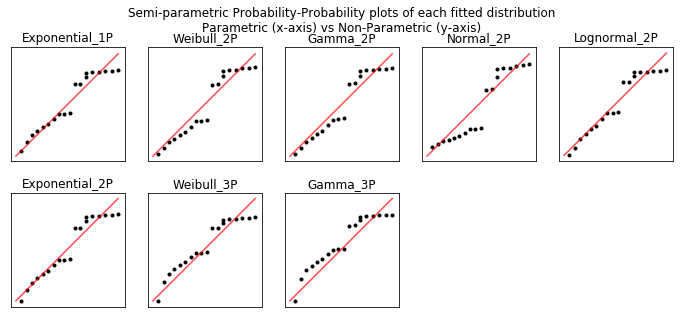

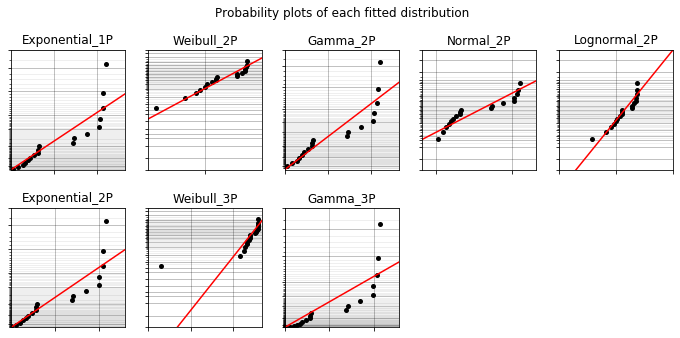

In [75]:
from reliability.Fitters import Fit_Everything
results=Fit_Everything(failures=ffail,right_censored=censored)